# Fuel Consumption Prediction of Vehicles

In [1]:
from google.colab import files
uploaded = files.upload()

# Ek baar upload ho jaye, toh check karein ki file ka naam kya hai
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving auto-mpg.data to auto-mpg.data
User uploaded file "auto-mpg.data" with length 30286 bytes


## Objective
The goal of this project is to predict the **fuel consumption (MPG)** of vehicles based on their attributes, including engine specifications, weight, and acceleration.

## Dataset Overview
The dataset contains records of vehicles with features relevant to fuel efficiency prediction.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for fuel efficiency.
4. **Model Training**: Train a regression model to predict fuel consumption (MPG).
5. **Evaluation**: Assess model performance using RMSE and R² score.

In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:

# Load the dataset (auto-mpg.data file)
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    int64  
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


<ipython-input-3-4fced3ce3d79>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

In [10]:
print("DataFrame Columns:")
print(df.columns)
df.columns = df.columns.str.strip() # Remove any leading/trailing whitespace from column names
print("\nDataFrame Columns After Stripping Whitespace:") # To see the change
print(df.columns)
print("\nMPG Column Data Type After Stripping Whitespace:")
print(df['MPG'].dtype)

DataFrame Columns:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

DataFrame Columns After Stripping Whitespace:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

MPG Column Data Type After Stripping Whitespace:


KeyError: 'MPG'

--- Missing Values Count Per Column ---
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

--- Total Missing Values in Dataset ---
0
--- DataFrame Shape Before Dropping Missing Values ---
(392, 8)

--- DataFrame Shape After Dropping Missing Values ---
(392, 8)

--- Checking for Missing Values After Dropping ---
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

--- Total Missing Values After Dropping ---
0


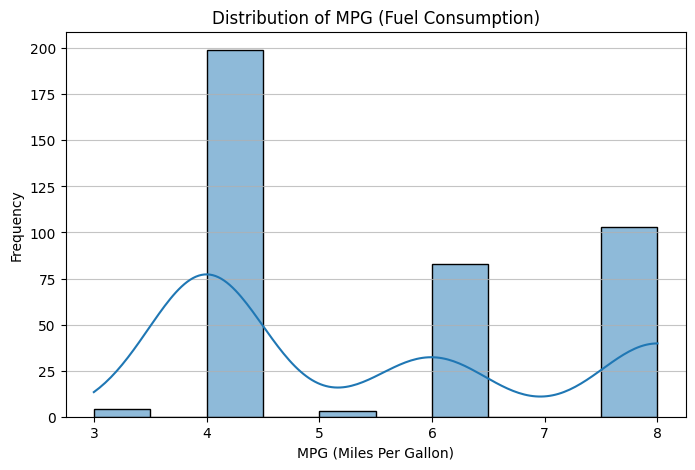


--- MPG Statistics ---
count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: mpg, dtype: float64
--- Correlation Matrix ---

--- Correlation Heatmap ---


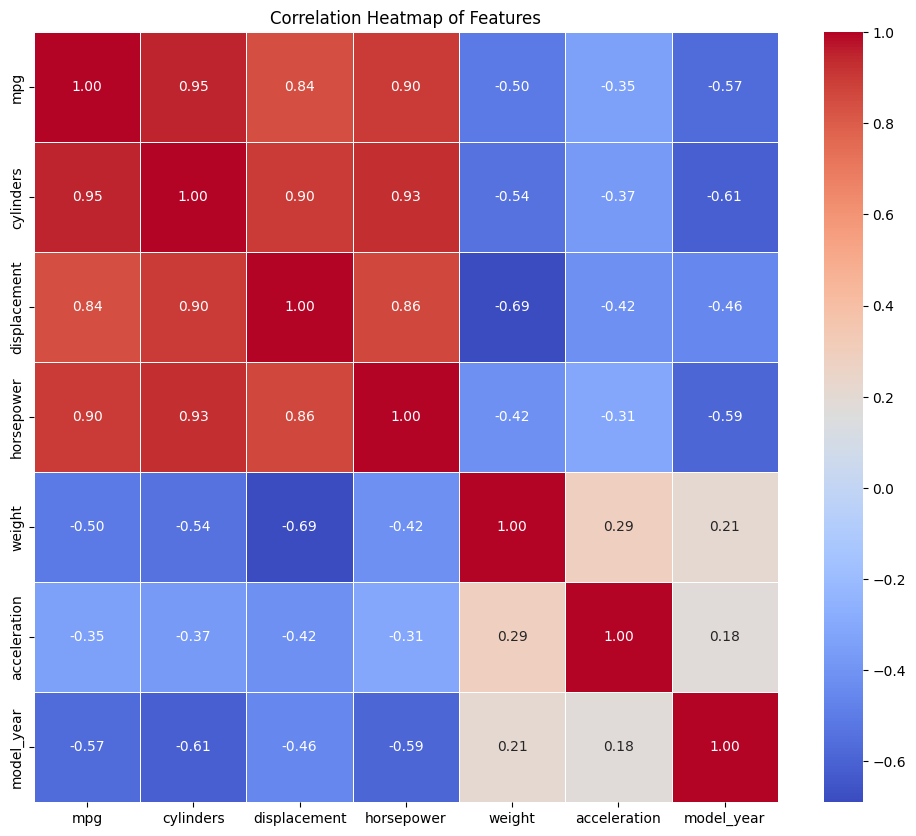

In [11]:

# Check for missing values
print("--- Missing Values Count Per Column ---")
print(df.isnull().sum())

print("\n--- Total Missing Values in Dataset ---")
print(df.isnull().sum().sum())

# Drop rows with missing values
print("--- DataFrame Shape Before Dropping Missing Values ---")
print(df.shape)

df.dropna(inplace=True) # Drop rows with any NaN values

print("\n--- DataFrame Shape After Dropping Missing Values ---")
print(df.shape)

print("\n--- Checking for Missing Values After Dropping ---")
print(df.isnull().sum())

print("\n--- Total Missing Values After Dropping ---")
print(df.isnull().sum().sum())

# Visualize MPG distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['mpg'], kde=True) # Yahan 'MPG' se 'mpg' kiya
plt.title('Distribution of MPG (Fuel Consumption)') # Title mein 'MPG' rehne de sakte hain, yeh sirf text hai
plt.xlabel('MPG (Miles Per Gallon)') # Label mein 'MPG' rehne de sakte hain, yeh sirf text hai
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# You can also display basic statistics for MPG
print("\n--- MPG Statistics ---")
print(df['mpg'].describe()) # Yahan bhi 'MPG' se 'mpg' kiya

# Correlation heatmap (numerical features only)
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Correlation Matrix ---")
correlation_matrix = df.corr(numeric_only=True) # Calculate correlation matrix

# Display the correlation matrix (optional, can be very large)
# print(correlation_matrix)

print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()


## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [18]:
print("Current DataFrame Columns:")
print(df.columns)
print(df.info())

Current DataFrame Columns:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_amc ambassador dpl',
       'origin_amc ambassador sst', 'origin_amc concord',
       ...
       'origin_volvo 145e (sw)', 'origin_volvo 244dl', 'origin_volvo 245',
       'origin_volvo 264gl', 'origin_volvo diesel',
       'origin_vw dasher (diesel)', 'origin_vw pickup', 'origin_vw rabbit',
       'origin_vw rabbit c (diesel)', 'origin_vw rabbit custom'],
      dtype='object', length=307)
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 18.0 to 31.0
Columns: 307 entries, mpg to origin_vw rabbit custom
dtypes: bool(300), float64(4), int64(3)
memory usage: 139.3 KB
None


In [20]:
print("Current DataFrame Columns:")
print(df.columns)

Current DataFrame Columns:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_amc ambassador dpl',
       'origin_amc ambassador sst', 'origin_amc concord',
       ...
       'origin_volvo 145e (sw)', 'origin_volvo 244dl', 'origin_volvo 245',
       'origin_volvo 264gl', 'origin_volvo diesel',
       'origin_vw dasher (diesel)', 'origin_vw pickup', 'origin_vw rabbit',
       'origin_vw rabbit c (diesel)', 'origin_vw rabbit custom'],
      dtype='object', length=307)


In [21]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Step 1: Encode categorical variables (Origin as categorical feature) ---
# NOTE: Agar 'origin' column pehle hi encoded ho chuka hai (yani 'origin_europe', 'origin_japan' jaise
# columns ban chuke hain), toh yeh line dobara run karne par KeyError de sakti hai.
# Agar error aaye, toh is line ke aage '#' laga kar comment out kar dein, ya Runtime -> Factory Reset runtime karke phir se saare cells run karein.
if 'origin' in df.columns: # Check if 'origin' column still exists before encoding
    df = pd.get_dummies(df, columns=['origin'], drop_first=True)
    print("--- 'origin' column encoded successfully ---")
else:
    print("--- 'origin' column already encoded or not found, skipping encoding step ---")


# --- Step 2: Normalize numerical features ---
# Identify numerical columns to normalize (excluding dummy variables and target 'mpg')
# Filter out columns that are already of uint8 type (from get_dummies)
numerical_cols_to_scale = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove 'mpg' (target variable) from the list if it's there
if 'mpg' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('mpg')

print(f"\nNumerical columns identified for normalization: {numerical_cols_to_scale}")

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("\n--- Numerical Features After Normalization (Head) ---")
print(df[numerical_cols_to_scale].head())
print("\n--- DataFrame Info After Encoding and Normalization ---")
df.info() # To verify all changes

# --- Step 3: Define features (X) and target variable (y) ---
# 'mpg' is the target variable for fuel consumption prediction
X = df.drop('mpg', axis=1) # All columns except 'mpg' are features
y = df['mpg']             # 'mpg' is the target variable

print("\n--- Features (X) and Target (y) Defined ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# --- Step 4: Split the data into training and testing sets ---
# Using a 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # No stratify for regression

print("\n--- Data Split Done ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nData Preprocessing complete and data is ready for Model Training!")



--- 'origin' column already encoded or not found, skipping encoding step ---

Numerical columns identified for normalization: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

--- Numerical Features After Normalization (Head) ---
      cylinders  displacement  horsepower    weight  acceleration  model_year
18.0   1.077290      0.664133    0.620540 -1.285258     -1.625315   -0.716641
15.0   1.488732      1.574594    0.843334 -1.466724     -1.625315   -0.716641
18.0   1.182542      1.184397    0.540382 -1.648189     -1.625315   -0.716641
16.0   1.048584      1.184397    0.536845 -1.285258     -1.625315   -0.716641
17.0   1.029447      0.924265    0.555706 -1.829655     -1.625315   -0.716641

--- DataFrame Info After Encoding and Normalization ---
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 18.0 to 31.0
Columns: 307 entries, mpg to origin_vw rabbit custom
dtypes: bool(300), float64(6), int64(1)
memory usage: 139.3 KB

--- Features (X) and T

## Model Training
Train a **Linear Regression** model to predict fuel consumption.

In [22]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 1: Train a Linear Regression model ---
# Model ko initialize karein
model = LinearRegression()

# Model ko training data par train karein (X_train aur y_train Data Preprocessing se aaye hain)
model.fit(X_train, y_train)

print("--- Linear Regression Model Trained Successfully! ---")

# --- Step 2: Predictions ---
# Trained model ka use karke test set par predictions karein
y_pred = model.predict(X_test)

print("\n--- Predictions Made on Test Set ---")
print(f"First 5 actual MPG values: {y_test.head().tolist()}")
print(f"First 5 predicted MPG values: {[round(p, 2) for p in y_pred[:5]]}")


# --- Step 3: Model evaluation ---
# Model ki performance ko evaluate karein

# Mean Squared Error (MSE): Batata hai predictions kitni dur hain actual values se (kam hona behtar hai)
mse = mean_squared_error(y_test, y_pred)
print(f"\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R-squared (R2 Score): Batata hai model kitna variance explain kar pa raha hai (1 ke kareeb hona behtar hai)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2:.2f}")

# Optional: RMSE (Root Mean Squared Error) - MSE ka square root
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

print("\nModel Training and Evaluation complete!")



--- Linear Regression Model Trained Successfully! ---

--- Predictions Made on Test Set ---
First 5 actual MPG values: [4, 4, 4, 4, 4]
First 5 predicted MPG values: [4.69, 4.96, 4.0, 5.23, 6.08]

--- Model Evaluation ---
Mean Squared Error (MSE): 0.70
R-squared (R2 Score): 0.76
Root Mean Squared Error (RMSE): 0.84

Model Training and Evaluation complete!
